# Detect Landmarks of Face (MTCNN + HaarCascade)

[{'box': [50, 14, 124, 179], 'confidence': 0.9434108138084412, 'keypoints': {'left_eye': (87, 75), 'right_eye': (142, 101), 'nose': (98, 119), 'mouth_left': (68, 147), 'mouth_right': (105, 166)}}]
얼굴 인식좌표: [50, 14, 124, 179]
눈 인식좌표: [[ 22  42  32  32]
 [ 67  66  41  41]
 [ 17 127  46  46]
 [ 32 102  33  33]]
코 인식좌표: [[31 93 43 35]]
코 인식 중심좌표: (102, 124)


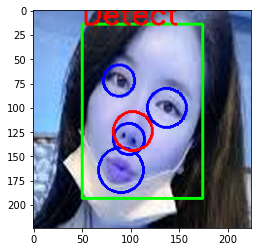

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN


def detect_landmarks(img):
    new_img = img.copy()
    frame_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

    ##### MTCNN 얼굴 인식 #####
    faces = detector.detect_faces(frame_rgb)
    print(faces)
    if faces:
        face = faces[0]['box']
        if face[0] < 0: face[0] = 0
        if face[1] < 0: face[1] = 0
        print('얼굴 인식좌표:', face)
        
        # 얼굴좌표
        x=face[0]; y=face[1]; w=face[2]; h=face[3]

        # 복사본 이미지에 얼굴의 위치를 표시
        center = (x + w//2, y + h//2)
        img_marked = cv2.rectangle(new_img, (x,y), (x+w,y+h), (0,255,0), 2)
        img_marked = cv2.putText(new_img, 'Detect', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # 관심영역(Region Of Interest) 설정
        ROIface = frame_rgb[y:y+h,x:x+w]

        
        ##### HaarCascade 눈 인식 #####
        eyes = eyes_cascade.detectMultiScale(ROIface)
        print('눈 인식좌표:', eyes)
        for (ex,ey,ew,eh) in eyes:
            # 복사본 이미지에 눈의 위치를 표시
            e_center = (x + ex + ew//2, y + ey + eh//2)
            radius = int(round((ew + eh) * 0.25))
            img_marked = cv2.circle(new_img, e_center, radius, (255, 0, 0 ), 2)

           
        ##### HaarCascade 코 인식 #####
        nose = nose_cascade.detectMultiScale(ROIface)
        print('코 인식좌표:', nose)
        if type(nose) == type(np.array([])):
            # 코가 검출되었다면 코 위치에 대한 좌표정보를 리턴받는다
            nx=nose[0][0]; ny=nose[0][1]; nw=nose[0][2]; nh=nose[0][3]
            
            # 복사본 이미지에 코의 위치를 표시
            nose_center = (x + nx + nw//2, y + ny + nh//2)
            print('코 인식 중심좌표:', nose_center)
            radius = int(round((nw + nh) * 0.25))
            img_marked = cv2.circle(new_img, nose_center, radius, (0, 0, 255), 2)
        else:
            return img_marked
            
        return img_marked
    
    else:
        return frame_rgb


# MTCNN으로 얼굴 인식
detector = MTCNN() # detector 객체 생성

# 코를 검출하기 위해 미리 학습시켜 놓은 XML 포맷으로 저장된 분류기를 로드
eyes_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier('./haarcascade_mcs_nose.xml')


# Load Image
# 맨얼굴
test0 = cv2.imread('../face_sample.jpg')
# 코스크
test1 = cv2.imread('../test1(nose).jpg')
test2 = cv2.imread('../test2(nose).jpg')
test3 = cv2.imread('../test3(nose).jpg') # 얼굴 인식 못함
test4 = cv2.imread('../test4(nose).jpg')
test5 = cv2.imread('../test5(nose).jpg')
test6 = cv2.imread('../test6(nose).jpg') # 코 인식 못함 --> crop & resize하면 해결
test7 = cv2.imread('../test7(nose).jpg') # 코 인식 못함
test8 = cv2.imread('../test8(nose).jpg') # 코 인식 못함
# 턱스크
test9 = cv2.imread('../test9(chin).jpg')
test10 = cv2.imread('../test10(chin).jpg') # 한쪽 눈만 인식, 코 인식 못함 --> crop & resize하면 코는 잘 잡고, 눈 4개 인식
test11 = cv2.imread('../test11(chin).jpg') # 한쪽 눈만 인식, 코 인식 못함 --> crop & resize하면 눈은 잘 잡고, 코 인식 못함
test12 = cv2.imread('../test12(chin).jpg') # 눈 4개 인식, 코 인식 잘함 --> crop & resize하면 눈2 코1 잘 잡음
# 마스크착용
test13 = cv2.imread('../test13(mask).jpg') # 코 인식 엉뚱하게함 --> crop & resize하면 코 못잡음(마스크 제대로 착용)


# Detect Landmarks of Face
img_detected = detect_landmarks(resized)

plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))

# Cropping & Resizing for FaceDetection

### If HaarCascade Find Landmarks Weird

[{'box': [84, 3, 65, 85], 'confidence': 0.9985392093658447, 'keypoints': {'left_eye': (103, 33), 'right_eye': (132, 45), 'nose': (109, 55), 'mouth_left': (93, 67), 'mouth_right': (115, 76)}}]


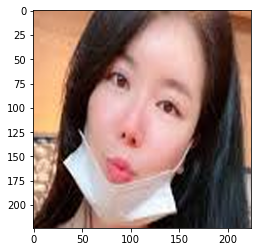

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN


def crop_resize_face(img):
    new_img = img.copy()
    frame_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    
    faces = detector.detect_faces(frame_rgb)
    print(faces)
    if faces:
        face = faces[0]['box']
        # 320x240으로 들어오는 이미지에서 적당하게 여유있게 얼굴영역 설정
        if face[0] < 0: face[0] = 0
        if face[1] < 0: face[1] = 0            
            
        new_face_x = face[0] - round(face[2]/2)
        new_face_y = face[1] - round(face[3]/2)
        new_face_w = face[2] * 2
        new_face_h = face[3] * 2
        
        if new_face_x < 0:
            new_face_x = 0
            new_face_w = face[0] + round(face[2]*1.5)
        if new_face_y < 0:
            new_face_y = 0
            new_face_h = face[1] + round(face[2]*1.5)
        
        
        # Cropping
        # cropped = frame_rgb[face[1]:face[1]+face[3], face[0]:face[0]+face[2]] # tightly crop
        cropped = frame_rgb[new_face_y:new_face_y+new_face_h, new_face_x:new_face_x+new_face_w] # widely crop
        
        # Resizing
        resized = cv2.resize(cropped, dsize=(224,224), interpolation=cv2.INTER_CUBIC) # 처리속도가 늦으면 INTER_CUBIC 대신 INTER_AREA 활용해보기(화질은 저하) 
        
    return resized


# MTCNN으로 얼굴 인식
detector = MTCNN() # detector 객체 생성


# Load Image
# 맨얼굴
test0 = cv2.imread('../face_sample.jpg')
# 코스크
test1 = cv2.imread('../test1(nose).jpg')
test2 = cv2.imread('../test2(nose).jpg')
test3 = cv2.imread('../test3(nose).jpg') # 얼굴 인식 못함
test4 = cv2.imread('../test4(nose).jpg')
test5 = cv2.imread('../test5(nose).jpg')
test6 = cv2.imread('../test6(nose).jpg') # 코 인식 못함 --> crop & resize하면 해결
test7 = cv2.imread('../test7(nose).jpg') # 코 인식 못함
test8 = cv2.imread('../test8(nose).jpg') # 코 인식 못함
# 턱스크
test9 = cv2.imread('../test9(chin).jpg')
test10 = cv2.imread('../test10(chin).jpg') # 한쪽 눈만 인식, 코 인식 못함 --> crop & resize하면 코는 잘 잡고, 눈 4개 인식
test11 = cv2.imread('../test11(chin).jpg') # 한쪽 눈만 인식, 코 인식 못함 --> crop & resize하면 눈은 잘 잡고, 코 인식 못함
test12 = cv2.imread('../test12(chin).jpg') # 눈 4개 인식, 코 인식 잘함 --> crop & resize하면 눈2 코1 잘 잡음
# 마스크착용
test13 = cv2.imread('../test13(mask).jpg') # 코 인식 엉뚱하게함 --> crop & resize하면 코 못잡음(마스크 제대로 착용)


# Crop & Resize Image
resized = crop_resize_face(test10)

plt.imshow(resized)

# Classify Nose (MTCNN + Haar Cascade)

[{'box': [59, -1, 98, 128], 'confidence': 0.999238133430481, 'keypoints': {'left_eye': (83, 52), 'right_eye': (132, 53), 'nose': (106, 81), 'mouth_left': (84, 99), 'mouth_right': (126, 100)}}]
얼굴 인식좌표: [59, 0, 98, 128]
코 인식 중심좌표: (106, 78)
11111 detected_nose 11111
[{'box': [59, -1, 98, 128], 'confidence': 0.999238133430481, 'keypoints': {'left_eye': (83, 52), 'right_eye': (132, 53), 'nose': (106, 81), 'mouth_left': (84, 99), 'mouth_right': (126, 100)}}]
[]
22222 not_detected_face 22222


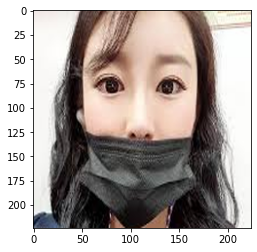

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN


# not_detected_face : 얼굴인식X / detected_nose : 얼굴인식-코스크 / not_detected_nose : 얼굴인식-코스크X
def classify_nose(img):
    frame_rgb = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    
    # MTCNN 얼굴 인식
    faces = detector.detect_faces(frame_rgb)
    print(faces)
    if faces:
        face = faces[0]['box']
        if face[0] < 0: face[0] = 0
        if face[1] < 0: face[1] = 0
        print('얼굴 인식좌표:', face)
        
        # 얼굴좌표
        x=face[0]; y=face[1]; w=face[2]; h=face[3]
        
        # 관심영역(Region Of Interest) 설정(cropping)
        ROIface = frame_rgb[y:y+h, x:x+w]

        # Haar Cascade 코 인식
        nose = nose_cascade.detectMultiScale(ROIface)
        # print('코 인식좌표:', nose)
        if type(nose) == type(np.array([])):
            # 코가 검출되었다면 코 위치에 대한 좌표정보를 리턴받는다
            nx=nose[0][0]; ny=nose[0][1]; nw=nose[0][2]; nh=nose[0][3]
            nose_center = (x + nx + nw//2, y + ny + nh//2)
            print('코 인식 중심좌표:', nose_center)          
            
            message = 'detected_nose' # 코 검출
            return message

        else:
            message = 'not_detected_nose' # 코 미검출
            return message

    else:
        message = 'not_detected_face' # 얼굴 미검출
        return message


# MTCNN으로 얼굴 인식
detector = MTCNN() # detector 객체 생성
    
# 코를 검출하기 위해 미리 학습시켜 놓은 XML 포맷으로 저장된 분류기를 로드
nose_cascade = cv2.CascadeClassifier('./haarcascade_mcs_nose.xml')


# Load Image
# 맨얼굴
test0 = cv2.imread('../face_sample.jpg')
# 코스크
test1 = cv2.imread('../test1(nose).jpg')
test2 = cv2.imread('../test2(nose).jpg')
test3 = cv2.imread('../test3(nose).jpg') # 얼굴 인식 못함
test4 = cv2.imread('../test4(nose).jpg')
test5 = cv2.imread('../test5(nose).jpg')
test6 = cv2.imread('../test6(nose).jpg') # 코 인식 못함 --> crop & resize하면 해결
test7 = cv2.imread('../test7(nose).jpg') # 코 인식 못함
test8 = cv2.imread('../test8(nose).jpg') # 코 인식 못함
# 턱스크
test9 = cv2.imread('../test9(chin).jpg')
test10 = cv2.imread('../test10(chin).jpg') # 한쪽 눈만 인식, 코 인식 못함 --> crop & resize하면 코는 잘 잡고, 눈 4개 인식
test11 = cv2.imread('../test11(chin).jpg') # 한쪽 눈만 인식, 코 인식 못함 --> crop & resize하면 눈은 잘 잡고, 코 인식 못함
test12 = cv2.imread('../test12(chin).jpg') # 눈 4개 인식, 코 인식 잘함 --> crop & resize하면 눈2 코1 잘 잡음
# 마스크착용
test13 = cv2.imread('../test13(mask).jpg') # 마스크를 썼는데도 코 인식을 엉뚱하게함(문제) --> crop & resize하면 코 못잡음(마스크 제대로 착용)


# Classify Nose (2중검사) --- 코스크에서 코를 잘 잡다가도 resize되면 얼굴을 못잡는 경우 발생
message = classify_nose(test1)
print('11111', message, '11111')

if message == 'detected_nose':
    resized = crop_resize_face(test1)
    message = classify_nose(resized)
    print('22222', message, '22222')
    plt.imshow(resized)

elif message == 'not_detected_nose':
    resized = crop_resize_face(test1)
    message = classify_nose(resized)
    print('22222', message, '22222')
    plt.imshow(resized)
    

# plt.imshow(cv2.cvtColor(test11, cv2.COLOR_BGR2RGB))

### 현재는 사진들마다 사이즈가 달라서 제각각 코를 잡거나 이상하게 잡거나 못잡거나 정확성을 보장할 수가 없다
### 카메라 센서로 저장되는 330x240 이미지에 적용해봐야한다.